In [1]:
import os


In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_rcv1


#Load the data and separate targets

credit_file_path= 'dataset/train.csv'
credit_data= pd.read_csv(credit_file_path)
y=credit_data.credit_card_default 
print(credit_data.describe)

<bound method NDFrame.describe of       customer_id            name  age gender owns_car owns_house  \
0      CST_115179        ita Bose   46      F        N          Y   
1      CST_121920  Alper Jonathan   29      M        N          Y   
2      CST_109330     Umesh Desai   37      M        N          Y   
3      CST_128288             Rie   39      F        N          Y   
4      CST_151355          McCool   46      M        Y          Y   
...           ...             ...  ...    ...      ...        ...   
45523  CST_130421           Doris   55      F        N          N   
45524  CST_136670         Luciana   31      F        N          Y   
45525  CST_145435         Jessica   27      F        N          Y   
45526  CST_130913           Tessa   32      M        Y          N   
45527  CST_160078        Gopinath   38      M        N          Y   

       no_of_children  net_yearly_income  no_of_days_employed occupation_type  \
0                 0.0          107934.04                

# Cleaning the data

In [3]:
#assigning numbers to categories
owns_car={'Y': 1, 'N': 0}
owns_house={'Y':1, 'N': 0}
credit_data["owns_car"]=credit_data["owns_car"].map(owns_car)
credit_data["owns_house"]=credit_data["owns_house"].map(owns_house)
credit_data["owns_car"]=pd.to_numeric(credit_data["owns_car"])
credit_data.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,0.0,1,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,0.0,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,0.0,1,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,0.0,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,1.0,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,1.0,0,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,0.0,1,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,1.0,1,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,NaN,1,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,1.0,1,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
my_encoder=LabelEncoder()
credit_data["occupation_type"]=my_encoder.fit_transform(credit_data["occupation_type"])

credit_data.head(10)

In [4]:
#Create X 

features = ['net_yearly_income', 'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months', 'owns_car', 'owns_house', 'no_of_children', 'no_of_days_employed', 'total_family_members', 'age', 'migrant_worker']

X=credit_data[features]
s=(X.dtypes=='object')
object_col=list(s[s].index)
print(object_col)
X.head()


[]


,net_yearly_income,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,owns_car,owns_house,no_of_children,no_of_days_employed,total_family_members,age,migrant_worker
0,107934.04,33070.28,18690.93,73,544.0,2,1,0.0,1,0.0,612.0,1.0,46,1.0
1,109862.62,15329.53,37745.19,52,857.0,0,0,0.0,1,0.0,2771.0,2.0,29,0.0
2,230153.17,48416.60,41598.36,43,650.0,0,0,0.0,1,0.0,204.0,2.0,37,0.0
3,122325.82,22574.36,32627.76,20,754.0,0,0,0.0,1,0.0,11941.0,2.0,39,0.0
4,387286.00,38282.95,52950.64,75,927.0,0,0,1.0,1,0.0,1459.0,1.0,46,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X[object_col]))
#OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X.index
#OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X.drop(object_col, axis=1)
#num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
#OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [5]:
#Removing missing data
cols_with_missing=[col for col in X.columns if X[col].isnull().any()]

reduced_X=X.drop(cols_with_missing, axis=1)

reduced_X.head()

,net_yearly_income,credit_limit,credit_limit_used(%),prev_defaults,default_in_last_6months,owns_house,age
0,107934.04,18690.93,73,2,1,1,46
1,109862.62,37745.19,52,0,0,1,29
2,230153.17,41598.36,43,0,0,1,37
3,122325.82,32627.76,20,0,0,1,39
4,387286.00,52950.64,75,0,0,1,46


# Visualisation of data

C:\Users\sayed\AppData\Local\Temp/ipykernel_12532/3293605928.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


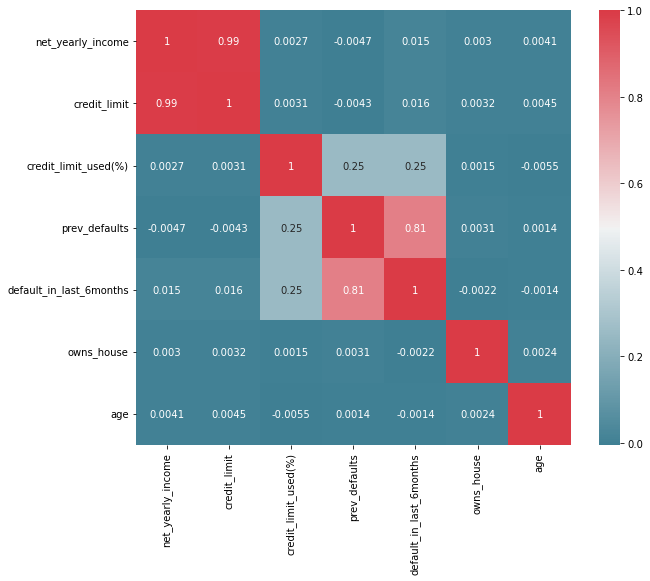

In [9]:
#heatmap

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = reduced_X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

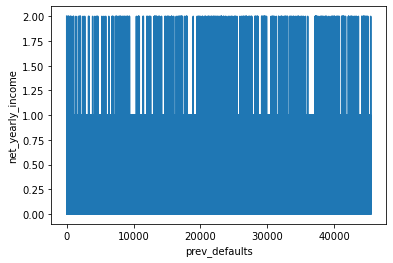

In [14]:
fig,ax=plt.subplots()
ax.plot(reduced_X["prev_defaults"])
plt.xlabel("prev_defaults")
plt.ylabel("net_yearly_income")
plt.show()

# Training the model

In [ ]:
#split data in training and validation
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y=train_test_split(reduced_X, y, test_size=0.2, random_state=42)

print(train_X.shape)
print(val_X.shape)

In [ ]:
#Evaluating the model
from sklearn import metrics
def evaluate_model(val_X, val_y, model_name):
    #from sklearn import metrics
    credit_pred=model_name.predict(val_X)
    print("Confusion matrix: ", metrics.confusion_matrix(val_y, credit_pred))
    print("Accuracy score: ", metrics.accuracy_score(val_y, credit_pred))
    print("Precision score: ", metrics.precision_score(val_y, credit_pred))
    print("Recall score: ", metrics.recall_score(val_y, credit_pred))
    print("F1 score: ", f1_score(val_y, credit_pred) )
    print("MAE: ", metrics.mean_absolute_error(credit_pred, val_y))

In [ ]:
#define a random forest classifier model
n_estimators=200
max_depth=25
min_samples_split=25
min_samples_leafs=2
credit_model= RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split, random_state=1)

#Fit model
credit_model.fit(train_X, train_y)

evaluate_model(val_X, val_y, credit_model)



#predict model

#credit_pred= credit_model.predict(val_X)

#predictions=pd.DataFrame({"Credit card default" : credit_pred})

#predictions.head()

In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(random_state=1)
logistic_model.fit(train_X, train_y)
evaluate_model(val_X, val_y, logistic_model)

In [ ]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(train_X, train_y)
evaluate_model(val_X, val_y, naive_bayes)

In [ ]:
#Saving the model

import joblib
joblib.dump(credit_model, "credit_model.pkl")

# Comparison of models

In [ ]:
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(credit_model, val_X, val_y)
plt.title("Random Forest")
plot_confusion_matrix(logistic_model, val_X, val_y)
plt.title("Logistic Regression")
plot_confusion_matrix(naive_bayes, val_X, val_y)
plt.title("Naive Bayes")

In [ ]:
#Plotting ROC_AUC curve of the models
from sklearn.metrics import plot_roc_curve
fig,ax=plt.subplots(figsize=(10,5))
plot_roc_curve(credit_model, val_X, val_y, ax=ax, color='red', label='Random Forest')
plot_roc_curve(logistic_model, val_X, val_y, ax=ax, color='blue', label="Logistic regression")
plot_roc_curve(naive_bayes, val_X, val_y, ax=ax, color='green', label="Naive Bayes")

In [ ]:
#Plotting Precision recall curve of the models
from sklearn.metrics import plot_precision_recall_curve
fig,ax=plt.subplots(figsize=(10,5))
plot_precision_recall_curve(credit_model, val_X, val_y, ax=ax, color='red', label='Random Forest')
plot_precision_recall_curve(logistic_model, val_X, val_y, ax=ax, color='blue', label="Logistic regression")
plot_precision_recall_curve(naive_bayes, val_X, val_y, ax=ax, color='green', label="Naive Bayes")

# Testing the model

In [ ]:
#test model
test_data_path='dataset/test.csv'

test_data = pd.read_csv(test_data_path)

In [ ]:
#assigning numbers to categories
owns_car={'Y': 1, 'N': 0}
owns_house={'Y':1, 'N': 0}
test_data["owns_car"]=test_data["owns_car"].map(owns_car)
test_data["owns_house"]=test_data["owns_house"].map(owns_house)
test_data["owns_car"]=pd.to_numeric(test_data["owns_car"])
test_data.head()

In [ ]:
#Cleaning the test data
test_X=test_data[features]
col_miss=[col for col in test_X.columns if test_X[col].isnull().any()]
reduced_test_X=test_X.drop(col_miss, axis=1)


In [ ]:
#Load the model
joblib_file="credit_model.pkl"

test_model=joblib.load(joblib_file)

#make predictions
test_pred=test_model.predict(reduced_test_X)

prediction=pd.DataFrame({"customer id": test_data.customer_id, "Credit card default" : test_pred})

print(prediction.head())
prediction.to_csv("prediction.csv", index=False)